<a href="https://colab.research.google.com/github/GBH7/Meachine-Learning/blob/main/dataminingLecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
robots = [[24,23680], [35, ], [46, 47350], [27, ]]
data = pd.DataFrame(robots, columns=['max_speed', 'price'])
print(data)

   max_speed    price
0         24  23680.0
1         35      NaN
2         46  47350.0
3         27      NaN


In [2]:
#axis=0이니 가로방향으로 결측값 있는 거 삭제
data.dropna(subset=['price'], axis=0, inplace=True)
print(data)

   max_speed    price
0         24  23680.0
2         46  47350.0


In [3]:
#결측값을 평균으로 대체
data = pd.DataFrame(robots, columns=['max_speed', 'price'])
mean = data['price'].mean()
data.replace(np.NaN, mean, inplace=True)
print(data)

   max_speed    price
0         24  23680.0
1         35  35515.0
2         46  47350.0
3         27  35515.0


In [4]:
#인덱스에 이름붙이기
import pandas as pd
df = pd.read_csv('iris_missing_values.csv')
df.index.name = 'record'
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


In [5]:
#결측값 확인하기
print(df['sepal length in cm'].isnull().values.any())

True


In [6]:
#결측값 총합
print(df['sepal length in cm'].isnull().values.sum())

6


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

selector.fit(df[cols])

print(selector.variances_)

In [ ]:
selector.set_params(threshold=0.6)

out_sel = selector.fit_transform(df[cols])

print(selector.get_support())

In [8]:
import matplotlib.pyplot as pit
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target
df.index.name = 'record'
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
record,,,,,,,,,
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


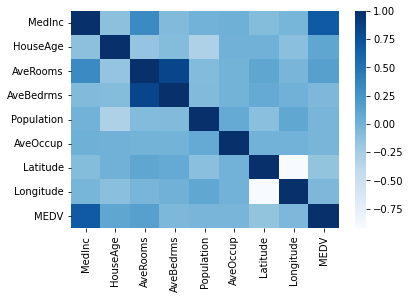

In [9]:
cor = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("iris.csv"); df.index.name = 'record'
cols = ['sepal length in cm', 'sepal width in cm',
        'petal length in cm', 'petal width in cm', ]

In [11]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
x = df[cols]
y = df['species']

In [12]:
#rfe로 피쳐셀렉션
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
[3 2 1 1]


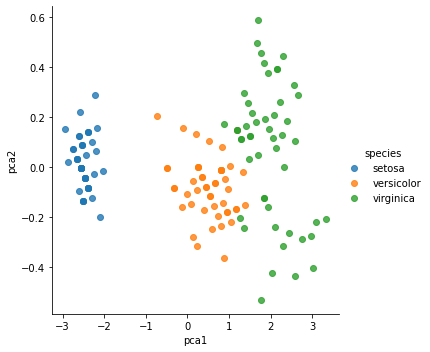

In [13]:
#pca 차원축소
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm', ]])

df_pca = pd.DataFrame(data=out_pca, columns=['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

In [14]:
print(pca.explained_variance_ratio_)

[0.99019934 0.00980066]


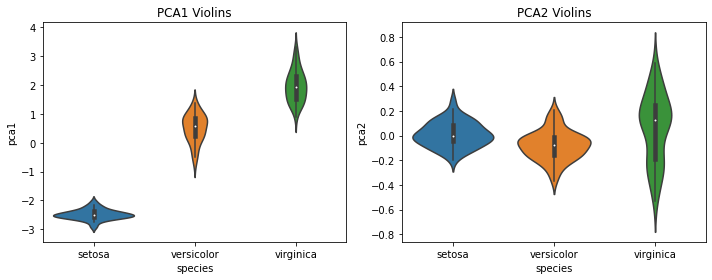

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)

sns.violinplot(x='species', y='pca1', data=df_pca, ax=ax1)
ax1.set(title='PCA1 Violins')
sns.violinplot(x='species', y='pca2', data=df_pca, ax=ax2)
ax2.set(title='PCA2 Violins')

plt.tight_layout()

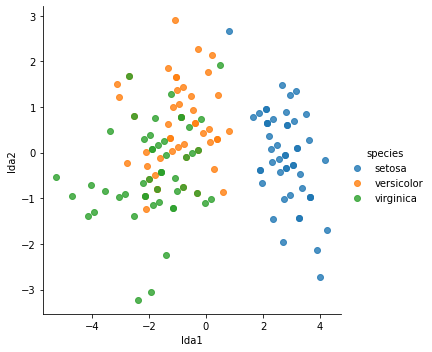

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

cols = ['sepal length in cm', 'sepal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])

df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis=1)

sns.lmplot(x='lda1', y='lda2', hue='species', data=df_lda, fit_reg=False)

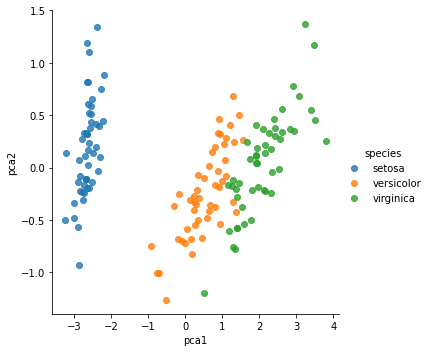

In [17]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm', 
                                'sepal length in cm',
                                'sepal width in cm']])

df_pca = pd.DataFrame(data=out_pca, columns=['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

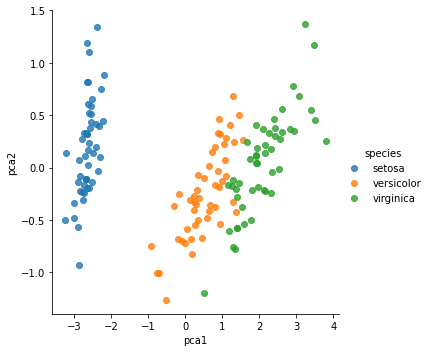

In [18]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm', 
                                'sepal length in cm',
                                'sepal width in cm']])

df_pca = pd.DataFrame(data=out_pca, columns=['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

In [19]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

def get_cali():
  dataset = fetch_california_housing()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df['MEDV'] = dataset.target
  df.index.name='record'
  X_train, X_test, y_train, y_test = \
  train_test_split(df.loc[:, df.columns != 'MEDV'], df['MEDV'], test_size=33, random_state=42)

  return [X_train, X_test, y_train, y_test]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = get_cali()

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score is ' + str(r2))

r2 score is 0.5955011867191937


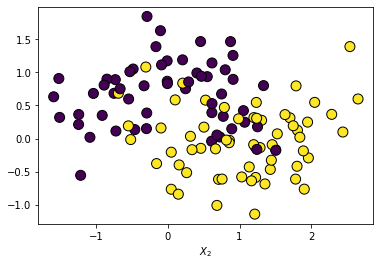

In [21]:
#make moons
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
  X, y = make_moons(n_samples= 150, noise = 0.4, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X,y,test_size=33, random_state=42)
  return[X_train, X_test,y_train,y_test]

X_train, X_test, y_train, y_test = get_moon_data()

plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, s=100,edgecolor='k')
plt.xlabel('$X_1$')
plt.xlabel('$X_2$')
plt.show()

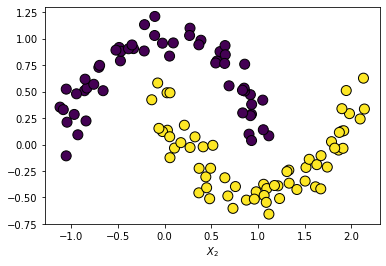

In [22]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
  X, y = make_moons(n_samples= 150, noise = 0.1, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X,y,test_size=33, random_state=42)
  return[X_train, X_test,y_train,y_test]

X_train, X_test, y_train, y_test = get_moon_data()

plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, s=100,edgecolor='k')
plt.xlabel('$X_1$')
plt.xlabel('$X_2$')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = LogisticRegression(penalty='l2', C=0.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("f1 score is = ",str(f1))

f1 score is =  0.8


In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()


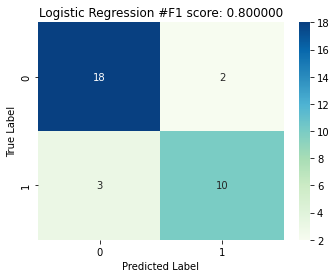

In [25]:
df_cm = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, cmap='GnBu', annot=True)

plt.title("Logistic Regression #F1 score: {0:3f}".format(f1_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

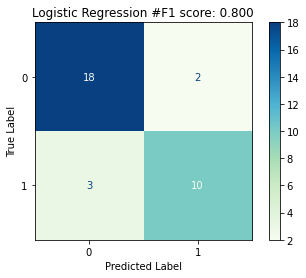

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='GnBu')
plt.title("Logistic Regression #F1 score: {0:.3f}".format(f1_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

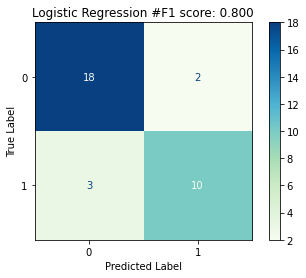

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, cmap='GnBu')
plt.title("Logistic Regression #F1 score: {0:.3f}".format(f1_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = get_moon_data()

clf = SVC(kernel = 'linear', C=0.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1  score is = "+str(f1))

f1  score is = 0.8


In [29]:
clf2=SVC(gamma=2,C=1)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1  score is = "+str(f1))

f1  score is = 1.0


In [30]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
  X, y = make_moons(n_samples= 150, noise = 0.1, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X,y,test_size=33, random_state=42)
  return[X_train, X_test,y_train,y_test]

X_train, X_test, y_train, y_test = get_moon_data()


plt.show()